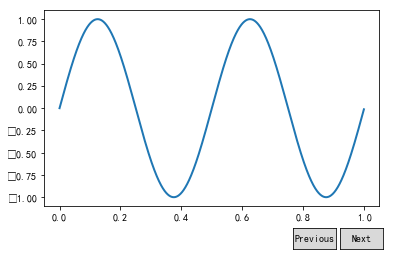

In [3]:
#Buttons

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = plt.plot(t, s, lw=2)

class Index(object):
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

callback = Index()
axprev = plt.axes([0.7, 0.05, 0.1, 0.075])
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()

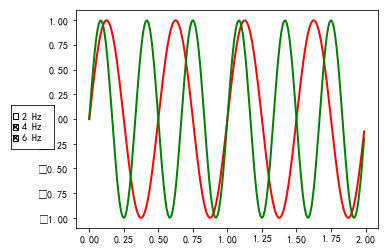

In [4]:
#Check Buttons

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons

t = np.arange(0.0, 2.0, 0.01)
s0 = np.sin(2*np.pi*t)
s1 = np.sin(4*np.pi*t)
s2 = np.sin(6*np.pi*t)

fig, ax = plt.subplots()
l0, = ax.plot(t, s0, visible=False, lw=2, color='k', label='2 Hz')
l1, = ax.plot(t, s1, lw=2, color='r', label='4 Hz')
l2, = ax.plot(t, s2, lw=2, color='g', label='6 Hz')
plt.subplots_adjust(left=0.2)

lines = [l0, l1, l2]

# Make checkbuttons with all plotted lines with correct visibility
rax = plt.axes([0.05, 0.4, 0.1, 0.15])
labels = [str(line.get_label()) for line in lines]
visibility = [line.get_visible() for line in lines]
check = CheckButtons(rax, labels, visibility)


def func(label):
    index = labels.index(label)
    lines[index].set_visible(not lines[index].get_visible())
    plt.draw()

check.on_clicked(func)

plt.show()

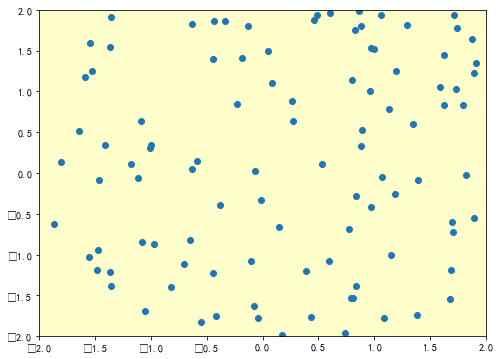

In [5]:
#Cursor

from matplotlib.widgets import Cursor
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, facecolor='#FFFFCC')

x, y = 4*(np.random.rand(2, 100) - .5)
ax.plot(x, y, 'o')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# set useblit = True on gtkagg for enhanced performance
cursor = Cursor(ax, useblit=True, color='red', linewidth=2)

plt.show()

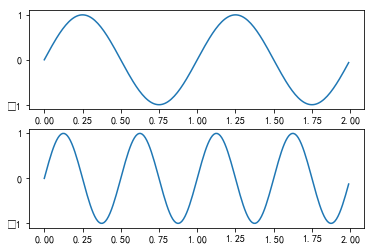

In [6]:
#Multicursor

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import MultiCursor

t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.sin(4*np.pi*t)
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(t, s1)


ax2 = fig.add_subplot(212, sharex=ax1)
ax2.plot(t, s2)

multi = MultiCursor(fig.canvas, (ax1, ax2), color='r', lw=1)
plt.show()

In [9]:
#Polygon Selector Demo
#Shows how one can select indices of a polygon interactively.

import numpy as np

from matplotlib.widgets import PolygonSelector
from matplotlib.path import Path


class SelectFromCollection(object):
    """Select indices from a matplotlib collection using `PolygonSelector`.

    Selected indices are saved in the `ind` attribute. This tool fades out the
    points that are not part of the selection (i.e., reduces their alpha
    values). If your collection has alpha < 1, this tool will permanently
    alter the alpha values.

    Note that this tool selects collection objects based on their *origins*
    (i.e., `offsets`).

    Parameters
    ----------
    ax : :class:`~matplotlib.axes.Axes`
        Axes to interact with.

    collection : :class:`matplotlib.collections.Collection` subclass
        Collection you want to select from.

    alpha_other : 0 <= float <= 1
        To highlight a selection, this tool sets all selected points to an
        alpha value of 1 and non-selected points to `alpha_other`.
    """

    def __init__(self, ax, collection, alpha_other=0.3):
        self.canvas = ax.figure.canvas
        self.collection = collection
        self.alpha_other = alpha_other

        self.xys = collection.get_offsets()
        self.Npts = len(self.xys)

        # Ensure that we have separate colors for each object
        self.fc = collection.get_facecolors()
        if len(self.fc) == 0:
            raise ValueError('Collection must have a facecolor')
        elif len(self.fc) == 1:
            self.fc = np.tile(self.fc, (self.Npts, 1))

        self.poly = PolygonSelector(ax, self.onselect)
        self.ind = []

    def onselect(self, verts):
        path = Path(verts)
        self.ind = np.nonzero(path.contains_points(self.xys))[0]
        self.fc[:, -1] = self.alpha_other
        self.fc[self.ind, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()

    def disconnect(self):
        self.poly.disconnect_events()
        self.fc[:, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()


if __name__ == '__main__':
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots()
    grid_size = 5
    grid_x = np.tile(np.arange(grid_size), grid_size)
    grid_y = np.repeat(np.arange(grid_size), grid_size)
    pts = ax.scatter(grid_x, grid_y)

    selector = SelectFromCollection(ax, pts)

    print("Select points in the figure by enclosing them within a polygon.")
    print("Press the 'esc' key to start a new polygon.")
    print("Try holding the 'shift' key to move all of the vertices.")
    print("Try holding the 'ctrl' key to move a single vertex.")

    plt.show()

    selector.disconnect()

    # After figure is closed print the coordinates of the selected points
    print('\nSelected points:')
    print(selector.xys[selector.ind])

ImportError: cannot import name 'PolygonSelector'

In [ ]:
#Lasso Selector Demo

from __future__ import print_function

from six.moves import input

import numpy as np

from matplotlib.widgets import LassoSelector
from matplotlib.path import Path


class SelectFromCollection(object):
    """Select indices from a matplotlib collection using `LassoSelector`.

    Selected indices are saved in the `ind` attribute. This tool fades out the
    points that are not part of the selection (i.e., reduces their alpha
    values). If your collection has alpha < 1, this tool will permanently
    alter the alpha values.

    Note that this tool selects collection objects based on their *origins*
    (i.e., `offsets`).

    Parameters
    ----------
    ax : :class:`~matplotlib.axes.Axes`
        Axes to interact with.

    collection : :class:`matplotlib.collections.Collection` subclass
        Collection you want to select from.

    alpha_other : 0 <= float <= 1
        To highlight a selection, this tool sets all selected points to an
        alpha value of 1 and non-selected points to `alpha_other`.
    """

    def __init__(self, ax, collection, alpha_other=0.3):
        self.canvas = ax.figure.canvas
        self.collection = collection
        self.alpha_other = alpha_other

        self.xys = collection.get_offsets()
        self.Npts = len(self.xys)

        # Ensure that we have separate colors for each object
        self.fc = collection.get_facecolors()
        if len(self.fc) == 0:
            raise ValueError('Collection must have a facecolor')
        elif len(self.fc) == 1:
            self.fc = np.tile(self.fc, (self.Npts, 1))

        self.lasso = LassoSelector(ax, onselect=self.onselect)
        self.ind = []

    def onselect(self, verts):
        path = Path(verts)
        self.ind = np.nonzero(path.contains_points(self.xys))[0]
        self.fc[:, -1] = self.alpha_other
        self.fc[self.ind, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()

    def disconnect(self):
        self.lasso.disconnect_events()
        self.fc[:, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()


if __name__ == '__main__':
    import matplotlib.pyplot as plt

    plt.ion()
    # Fixing random state for reproducibility
    np.random.seed(19680801)

    data = np.random.rand(100, 2)

    subplot_kw = dict(xlim=(0, 1), ylim=(0, 1), autoscale_on=False)
    fig, ax = plt.subplots(subplot_kw=subplot_kw)

    pts = ax.scatter(data[:, 0], data[:, 1], s=80)
    selector = SelectFromCollection(ax, pts)

    plt.draw()
    input('Press Enter to accept selected points')
    print("Selected points:")
    print(selector.xys[selector.ind])
    selector.disconnect()

    # Block end of script so you can check that the lasso is disconnected.
    input('Press Enter to quit')

In [ ]:
#Menu

import numpy as np

from matplotlib.widgets import PolygonSelector
from matplotlib.path import Path


class SelectFromCollection(object):
    """Select indices from a matplotlib collection using `PolygonSelector`.

    Selected indices are saved in the `ind` attribute. This tool fades out the
    points that are not part of the selection (i.e., reduces their alpha
    values). If your collection has alpha < 1, this tool will permanently
    alter the alpha values.

    Note that this tool selects collection objects based on their *origins*
    (i.e., `offsets`).

    Parameters
    ----------
    ax : :class:`~matplotlib.axes.Axes`
        Axes to interact with.

    collection : :class:`matplotlib.collections.Collection` subclass
        Collection you want to select from.

    alpha_other : 0 <= float <= 1
        To highlight a selection, this tool sets all selected points to an
        alpha value of 1 and non-selected points to `alpha_other`.
    """

    def __init__(self, ax, collection, alpha_other=0.3):
        self.canvas = ax.figure.canvas
        self.collection = collection
        self.alpha_other = alpha_other

        self.xys = collection.get_offsets()
        self.Npts = len(self.xys)

        # Ensure that we have separate colors for each object
        self.fc = collection.get_facecolors()
        if len(self.fc) == 0:
            raise ValueError('Collection must have a facecolor')
        elif len(self.fc) == 1:
            self.fc = np.tile(self.fc, (self.Npts, 1))

        self.poly = PolygonSelector(ax, self.onselect)
        self.ind = []

    def onselect(self, verts):
        path = Path(verts)
        self.ind = np.nonzero(path.contains_points(self.xys))[0]
        self.fc[:, -1] = self.alpha_other
        self.fc[self.ind, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()

    def disconnect(self):
        self.poly.disconnect_events()
        self.fc[:, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()


if __name__ == '__main__':
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots()
    grid_size = 5
    grid_x = np.tile(np.arange(grid_size), grid_size)
    grid_y = np.repeat(np.arange(grid_size), grid_size)
    pts = ax.scatter(grid_x, grid_y)

    selector = SelectFromCollection(ax, pts)

    print("Select points in the figure by enclosing them within a polygon.")
    print("Press the 'esc' key to start a new polygon.")
    print("Try holding the 'shift' key to move all of the vertices.")
    print("Try holding the 'ctrl' key to move a single vertex.")

    plt.show()

    selector.disconnect()

    # After figure is closed print the coordinates of the selected points
    print('\nSelected points:')
    print(selector.xys[selector.ind])

In [ ]:
#Polygon Selector Demo
#Shows how one can select indices of a polygon interactively.

import numpy as np

from matplotlib.widgets import PolygonSelector
from matplotlib.path import Path


class SelectFromCollection(object):
    """Select indices from a matplotlib collection using `PolygonSelector`.

    Selected indices are saved in the `ind` attribute. This tool fades out the
    points that are not part of the selection (i.e., reduces their alpha
    values). If your collection has alpha < 1, this tool will permanently
    alter the alpha values.

    Note that this tool selects collection objects based on their *origins*
    (i.e., `offsets`).

    Parameters
    ----------
    ax : :class:`~matplotlib.axes.Axes`
        Axes to interact with.

    collection : :class:`matplotlib.collections.Collection` subclass
        Collection you want to select from.

    alpha_other : 0 <= float <= 1
        To highlight a selection, this tool sets all selected points to an
        alpha value of 1 and non-selected points to `alpha_other`.
    """

    def __init__(self, ax, collection, alpha_other=0.3):
        self.canvas = ax.figure.canvas
        self.collection = collection
        self.alpha_other = alpha_other

        self.xys = collection.get_offsets()
        self.Npts = len(self.xys)

        # Ensure that we have separate colors for each object
        self.fc = collection.get_facecolors()
        if len(self.fc) == 0:
            raise ValueError('Collection must have a facecolor')
        elif len(self.fc) == 1:
            self.fc = np.tile(self.fc, (self.Npts, 1))

        self.poly = PolygonSelector(ax, self.onselect)
        self.ind = []

    def onselect(self, verts):
        path = Path(verts)
        self.ind = np.nonzero(path.contains_points(self.xys))[0]
        self.fc[:, -1] = self.alpha_other
        self.fc[self.ind, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()

    def disconnect(self):
        self.poly.disconnect_events()
        self.fc[:, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()


if __name__ == '__main__':
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots()
    grid_size = 5
    grid_x = np.tile(np.arange(grid_size), grid_size)
    grid_y = np.repeat(np.arange(grid_size), grid_size)
    pts = ax.scatter(grid_x, grid_y)

    selector = SelectFromCollection(ax, pts)

    print("Select points in the figure by enclosing them within a polygon.")
    print("Press the 'esc' key to start a new polygon.")
    print("Try holding the 'shift' key to move all of the vertices.")
    print("Try holding the 'ctrl' key to move a single vertex.")

    plt.show()

    selector.disconnect()

    # After figure is closed print the coordinates of the selected points
    print('\nSelected points:')
    print(selector.xys[selector.ind])